<a href="https://colab.research.google.com/github/ayanmmm/Insurance-Fraud/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business case**

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Random Forest Non-Parametric Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.

The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset.

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ayanmmm/Insurance-Fraud/main/insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [4]:
df.replace("?",np.nan,inplace=True) #replace all ? with nan

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# ProfileReport(df)

In [7]:
#policy_number>>unique>>del
#_c39>> del
#property_claim


In [8]:
#umbrella_limit>>zeros ==798>>79.8%
#capital-gains>>zeros==508>>50.8%
#capital-loss>>zeros==475>>47.5%
#incident_hour_of_the_day>>zeros==52>>5.2%
#injury_claim>>zeros==25>>2.5%

In [9]:
#fraud_reported

In [10]:
#auto_make

In [11]:
"""
collision_type>>msvl>>178>>17.8%
property_damage>>msvl>>360>>36%
police_report_available>>msvl>>343>>34.3%
"""

'\ncollision_type>>msvl>>178>>17.8%\nproperty_damage>>msvl>>360>>36%\npolice_report_available>>msvl>>343>>34.3%\n'

In [12]:
df["collision_type"]=df["collision_type"].fillna(df["collision_type"].mode()[0])
df["property_damage"]=df["property_damage"].fillna(df["property_damage"].mode()[0])
df["police_report_available"]=df["police_report_available"].fillna(df["police_report_available"].mode()[0])

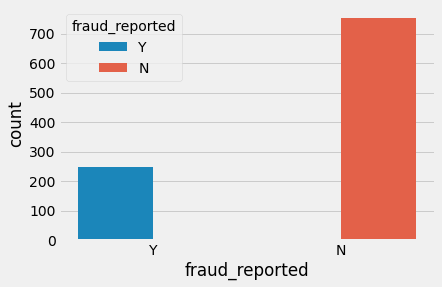

In [13]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [14]:
#From abobe plot, like most fraud datasets, the label distribution is skewed.
#Here we see that almost 25% fraud reported. Let’s try to look for an indicative variable. Let’s analyze location. This dataset only has information from the mid-Atlantic states from the USA.

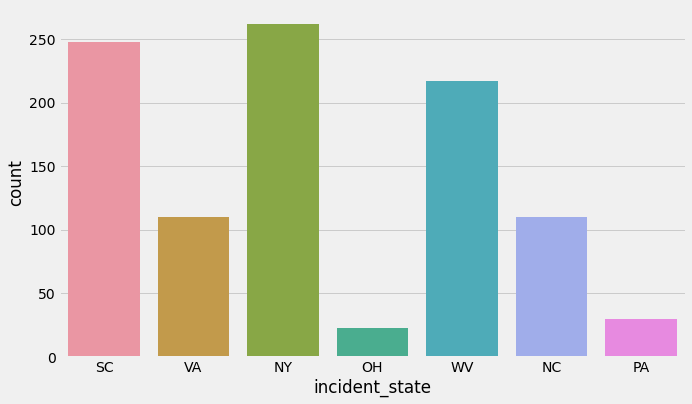

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

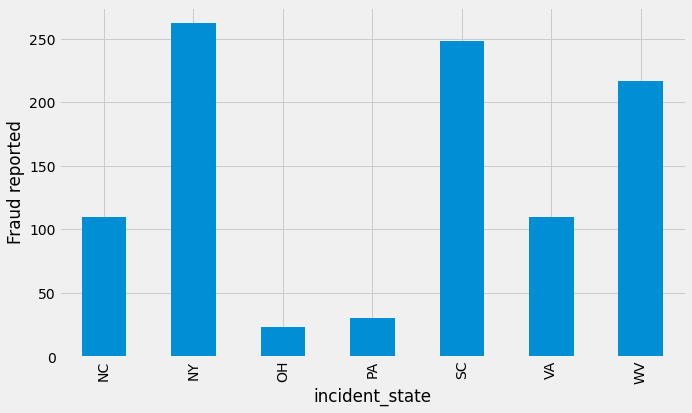

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

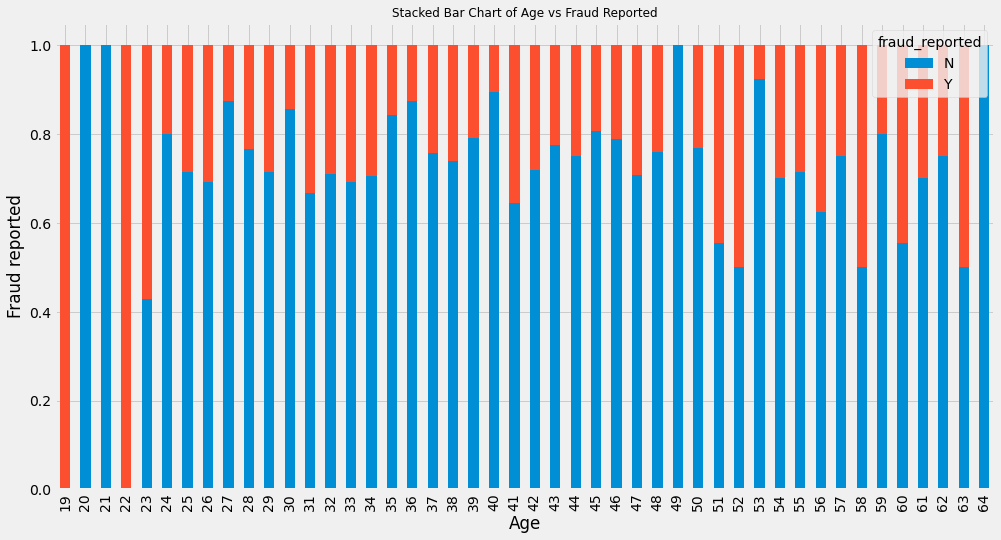

In [17]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

In [18]:
#From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

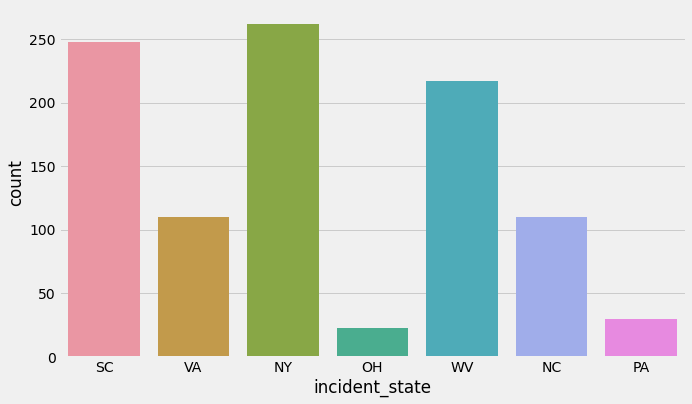

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

In [20]:
# more incident recoded in NY, SC,WV

In [21]:
uniquedf=df.nunique()

In [22]:
uniquedf

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [23]:
uniquedf.sort_values(ascending=False)

policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
authorities_contacted             5
witnesses                         4
incident_severity           

In [24]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [25]:
df.drop(["policy_number","policy_bind_date","policy_state","insured_zip","incident_location","incident_date","incident_state","incident_city","insured_hobbies","auto_make","auto_model","auto_year","_c39"],axis=1,inplace=True)

In [26]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


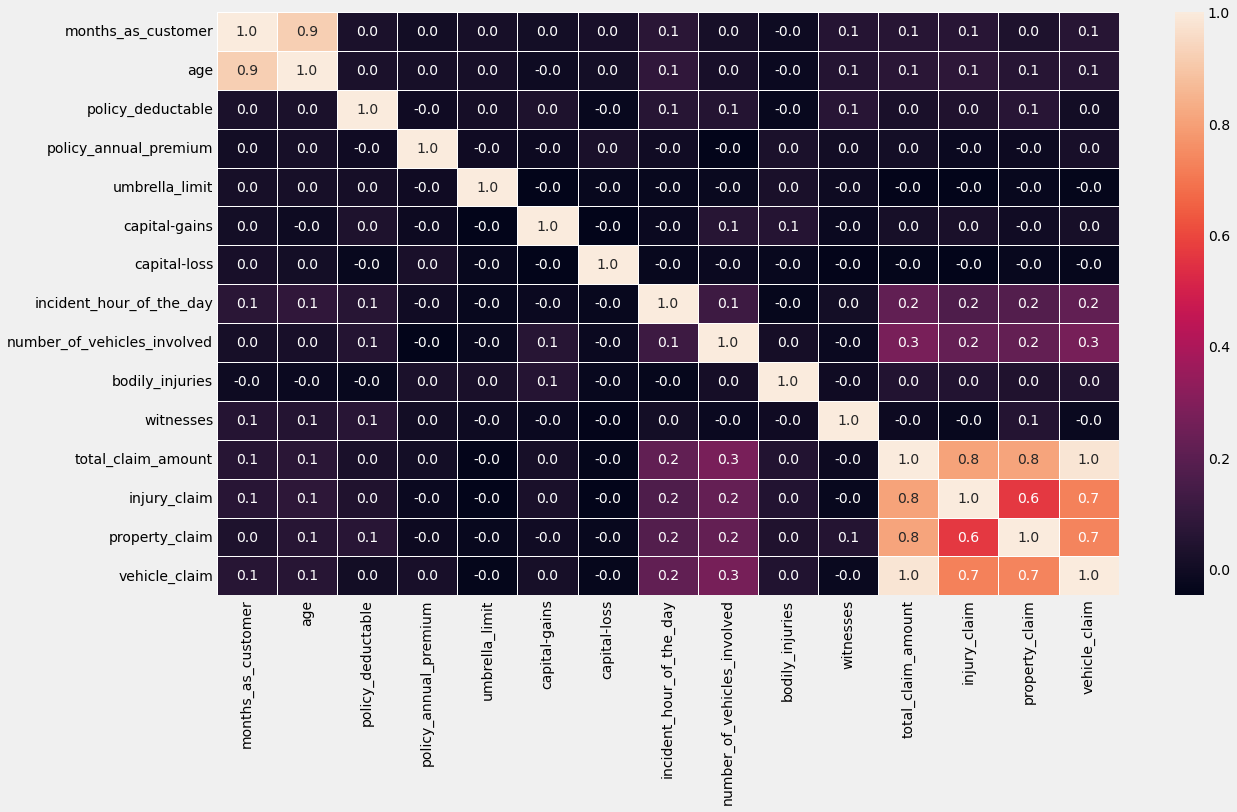

In [27]:
plt.figure(figsize=(18,10))
dfco=df.corr()
sns.heatmap(data = dfco, annot=True,fmt=".1f",linewidth=.5)
plt.show()

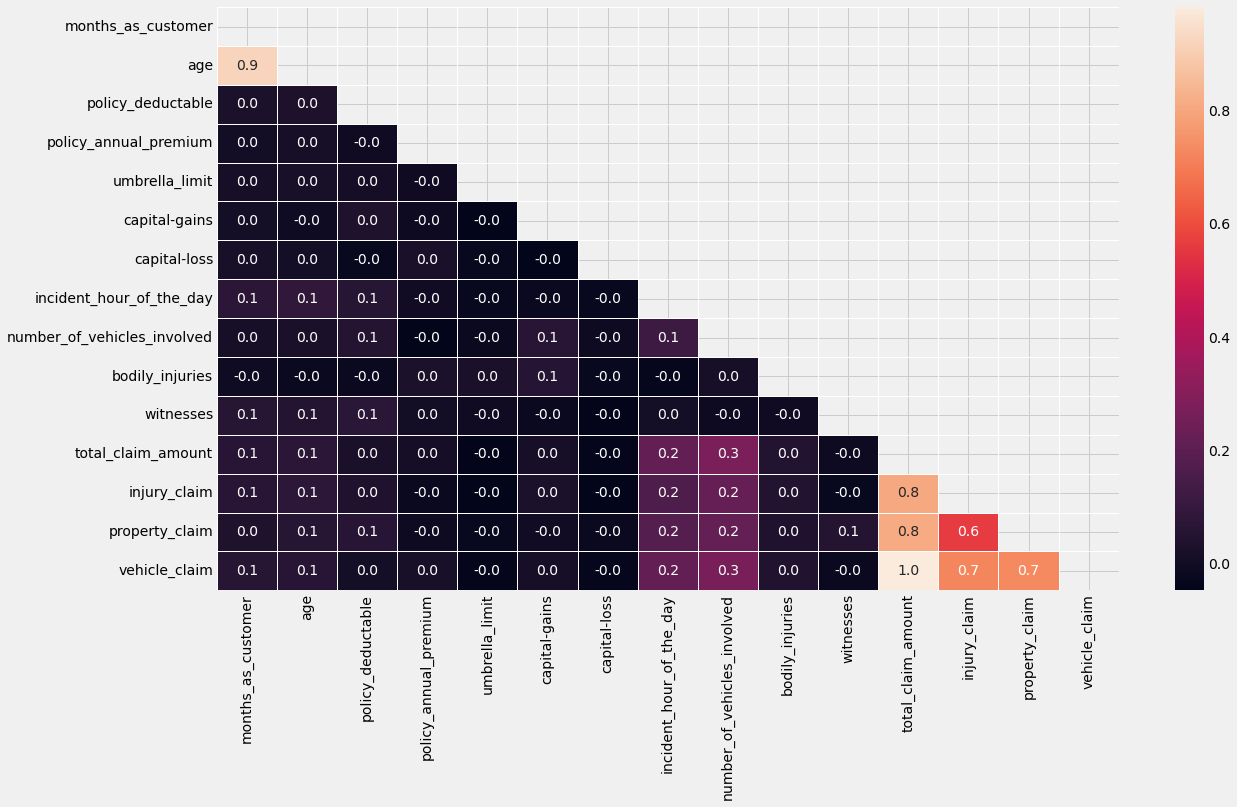

In [28]:
plt.figure(figsize=(18,10))
dfco=df.corr()
mask=np.triu(np.ones_like(dfco,dtype = bool))
sns.heatmap(data = dfco,mask=mask, annot=True,fmt=".1f",linewidth=.5)
plt.show()

In [29]:
#age and months_as_customer

In [30]:
#total_claim_amount,injury_claim,property_claim is corelated with vehicle_claim vehicle_claim

In [31]:
df.drop(["age","total_claim_amount",],axis=1,inplace=True)

In [32]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [33]:
#Encoding

In [34]:
df.fraud_reported = df.fraud_reported.map({'Y':1, 'N':0})
df.insured_sex = df.insured_sex.map({'MALE':1,'FEMALE':0})
df.insured_education_level = df.insured_education_level.map({'High School': 1, 'College': 2, 'Associate': 2, 'JD': 3,\
                                                             'Masters': 4, 'MD': 5, 'PhD': 6})
df.incident_severity = df.incident_severity.map({'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3, 'Trivial Damage': 4})

In [35]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [36]:
features = ['months_as_customer','csl_per_person','csl_per_accident','policy_deductable',\
            'policy_annual_premium','umbrella_limit','insured_sex','insured_education_level','insured_occupation',\
            'insured_relationship','capital-gains','capital-loss','incident_type','collision_type',\
            'incident_severity','authorities_contacted','incident_hour_of_the_day','number_of_vehicles_involved',\
            'property_damage','bodily_injuries','witnesses','police_report_available',\
            'fraud_reported']
df = pd.get_dummies(df[features],drop_first=True)
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,...,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,1406.91,0,1,5,53300,0,2,5,...,1,0,0,1,0,0,0,1,1,1
1,228,2000,1197.22,5000000,1,5,0,0,1,8,...,0,1,1,0,0,0,0,1,0,0
2,134,2000,1413.14,5000000,0,6,35100,0,1,7,...,0,0,1,0,0,0,0,1,0,0
3,256,2000,1415.74,6000000,0,6,48900,-62400,2,5,...,1,0,0,0,0,0,0,1,0,0
4,228,1000,1583.91,6000000,1,2,66000,-46000,1,20,...,0,1,1,0,0,1,0,0,0,0


In [37]:
#Feature and target

In [38]:
x=df.drop(["fraud_reported"],axis=1)
y=df["fraud_reported"]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 46), (200, 46), (800,), (200,))

In [42]:
#Prediction using KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [44]:
pred = knn.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test,pred))

[[148   0]
 [ 52   0]]


In [46]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

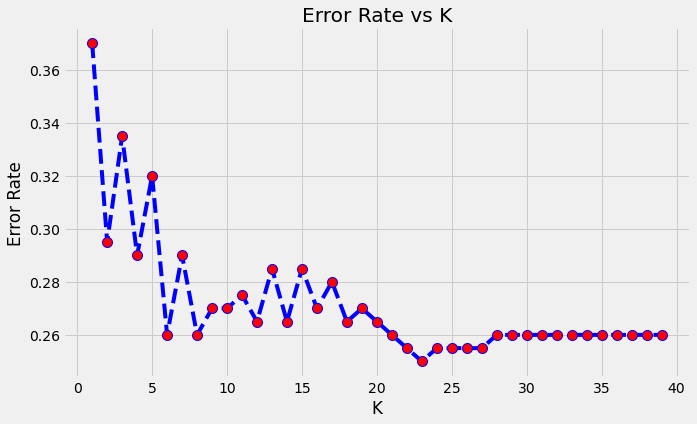

In [47]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
print(metrics.accuracy_score(y_test, pred))
knn.score(x_train,y_train)

0.74


0.75625

In [49]:
#Prediction using Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [51]:
predR = logmodel.predict(x_test)

In [52]:
logmodel.score(x_test,y_test)

0.715

In [53]:
#DecisionTreeClasification

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[112,  36],
       [ 32,  20]])

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.66


In [57]:
#Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))

Test set accuracy: 0.69
Test set auc: 0.63


In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(x_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.75625  Cross val score :  0.75625
Depth  :  2  Training Accuracy :  0.80875  Cross val score :  0.80625
Depth  :  3  Training Accuracy :  0.82125  Cross val score :  0.7975000000000001
Depth  :  4  Training Accuracy :  0.82875  Cross val score :  0.7812500000000001
Depth  :  5  Training Accuracy :  0.8325  Cross val score :  0.78125
Depth  :  6  Training Accuracy :  0.84625  Cross val score :  0.7749999999999999
Depth  :  7  Training Accuracy :  0.86125  Cross val score :  0.7575000000000001
Depth  :  8  Training Accuracy :  0.88375  Cross val score :  0.76
Depth  :  9  Training Accuracy :  0.91125  Cross val score :  0.73375
Depth  :  10  Training Accuracy :  0.93625  Cross val score :  0.7350000000000001
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.71625


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)
importance = dt.feature_importances_
list(zip(importance,x_test.columns)) # it calculates the feature importances based on IG

[(0.033870394142006086, 'months_as_customer'),
 (0.0, 'policy_deductable'),
 (0.05155670296075696, 'policy_annual_premium'),
 (0.01586330868499844, 'umbrella_limit'),
 (0.0, 'insured_sex'),
 (0.0, 'insured_education_level'),
 (0.017259464052563296, 'capital-gains'),
 (0.0, 'capital-loss'),
 (0.7440840500593155, 'incident_severity'),
 (0.05742823885869751, 'incident_hour_of_the_day'),
 (0.0, 'number_of_vehicles_involved'),
 (0.0, 'bodily_injuries'),
 (0.02623438535989622, 'witnesses'),
 (0.0, 'csl_per_person_250'),
 (0.0, 'csl_per_person_500'),
 (0.0, 'csl_per_accident_300'),
 (0.0, 'csl_per_accident_500'),
 (0.0, 'insured_occupation_armed-forces'),
 (0.0, 'insured_occupation_craft-repair'),
 (0.026586961962876726, 'insured_occupation_exec-managerial'),
 (0.0, 'insured_occupation_farming-fishing'),
 (0.027116493918889418, 'insured_occupation_handlers-cleaners'),
 (0.0, 'insured_occupation_machine-op-inspct'),
 (0.0, 'insured_occupation_other-service'),
 (0.0, 'insured_occupation_priv-ho

In [62]:
#incident_severity,umbrella_limit

In [63]:
#xgboost

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 0.1, n_estimators = 100)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [65]:
print(accuracy_score(y_test, y_pred))

0.76


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

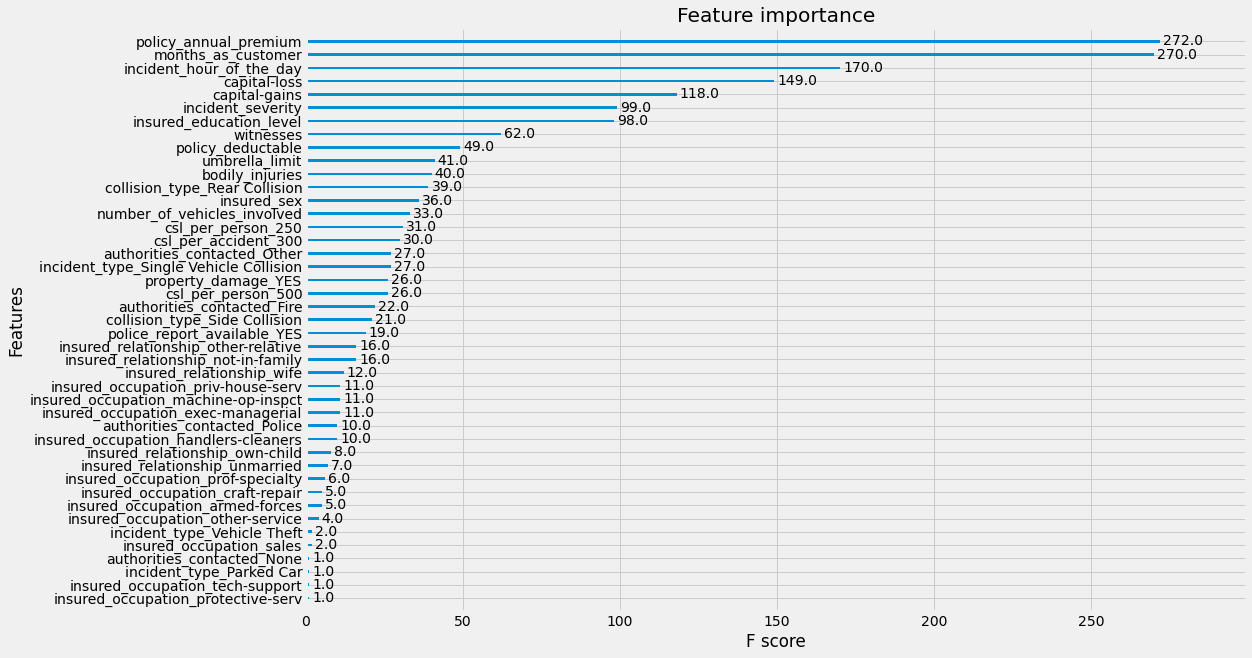

In [66]:
from xgboost import plot_importance
x = XGBClassifier()
x.fit(x_train, y_train) # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [15, 10]
# plot feature importance
plot_importance(x)

In [ ]:
#SCORE
#KNN-0.755
#LogisticRegression-0.74
#DT-80
#XGBOOST-0.76